In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50 

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2138 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

67

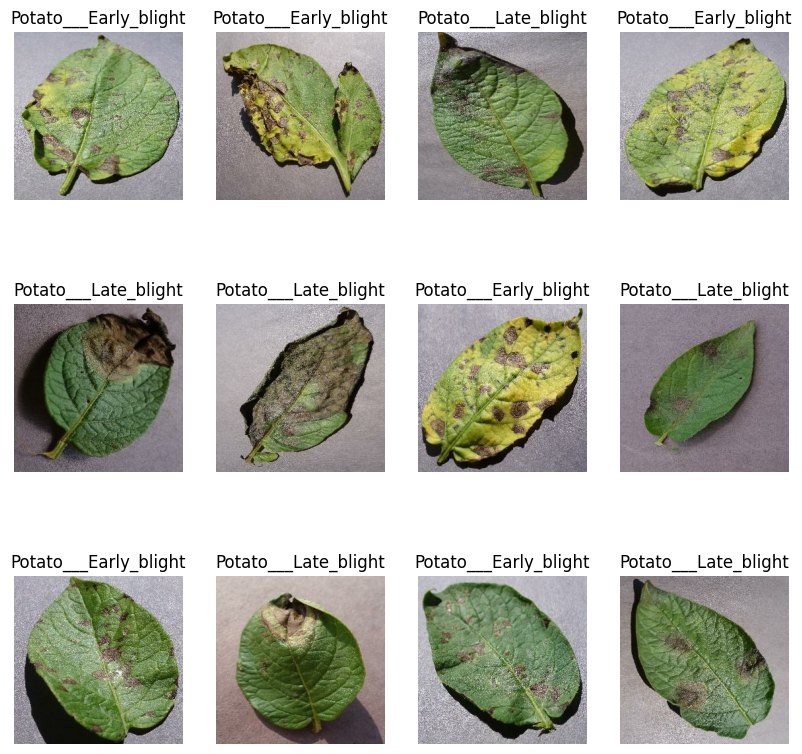

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [9]:
train_size = 0.8
len(dataset)*train_size

53.6

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

13

In [12]:
val_size = 0.1
len(dataset)*val_size

6.7

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

7

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split* ds_size)
    val_size = int(val_split* ds_size)

    train_ds =ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    
    return train_ds,val_ds,test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

53

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

6

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resizes images to (IMAGE_SIZE, IMAGE_SIZE)
    layers.Rescaling(1.0 / 255)  # Rescales pixel values to [0, 1]
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [23]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_class = 3
# Define the model
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Explicit input layer
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),    # Resize images
    layers.Rescaling(1.0 / 255),                # Rescale pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),               # Max pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),                          # Flatten output for Dense layers
    layers.Dense(64, activation='relu'),       # Fully connected layer
    layers.Dense(n_class, activation='softmax')  # Output layer with softmax
])
model.summary()

C:\Users\ditib\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,742,979 (14.28 MB)

 Trainable params: 3,742,979 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,             
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5947 - loss: 1.1289 - val_accuracy: 0.8333 - val_loss: 0.4449
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8595 - loss: 0.3271 - val_accuracy: 0.8438 - val_loss: 0.3635
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9016 - loss: 0.2593 - val_accuracy: 0.9271 - val_loss: 0.2407
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9607 - loss: 0.1234 - val_accuracy: 0.9688 - val_loss: 0.1051
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9767 - loss: 0.0756 - val_accuracy: 0.9531 - val_loss: 0.1085
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9758 - loss: 0.0704 - val_accuracy: 0.9583 - val_loss: 0.1428
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9804 - loss: 0.0530 - val_accuracy: 0.9792 - val_loss: 0.0807
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9720 - loss: 0.0669 - val_accuracy: 0.9583 - val_loss:

In [26]:
scores = model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.9766 - loss: 0.2628


In [27]:
scores

[0.2210310846567154, 0.9739583134651184]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 53}

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

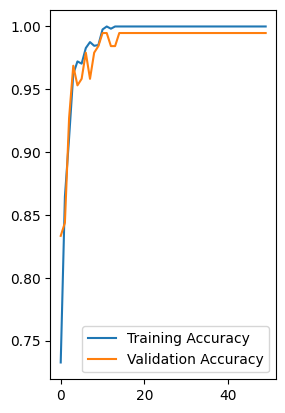

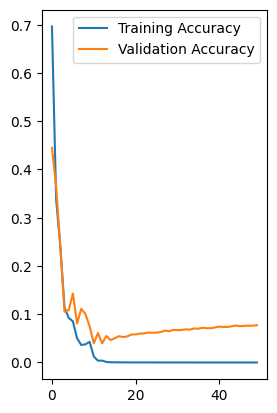

In [32]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='Validation Accuracy')
plt.legend()
plt.show()

First image to predict
Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


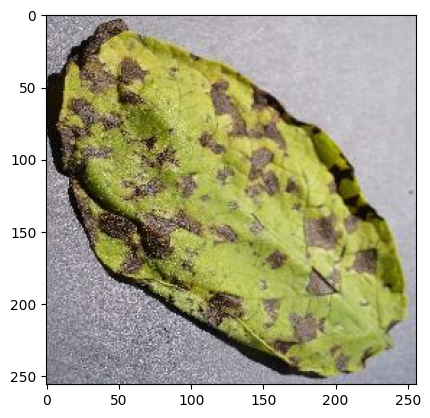

In [33]:
for image_batch, label_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print('First image to predict')
    first_label = label_batch[0].numpy()
    print(class_names[first_label])
    batch_prediction = model.predict(image_batch)

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


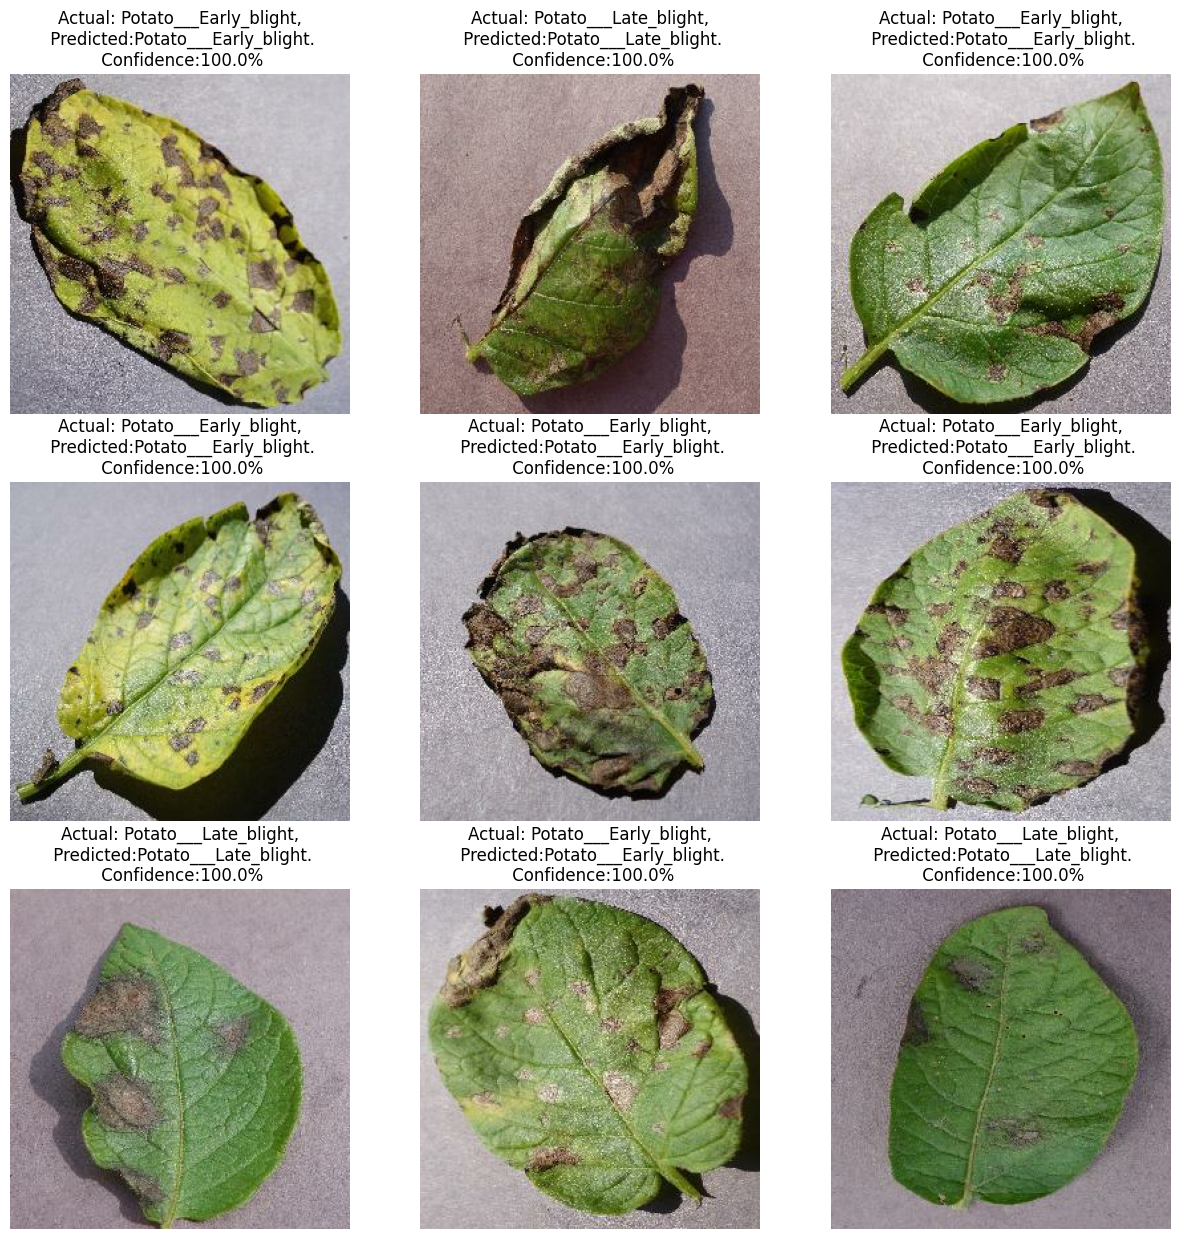

In [35]:
import numpy as np
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        
        plt.axis('off')

In [36]:
model_version =1
model.export(f"Desktop//Plant Disease Detection//models{model_version}")

INFO:tensorflow:Assets written to: Desktop//Plant Disease Detection//models1\assets


INFO:tensorflow:Assets written to: Desktop//Plant Disease Detection//models1\assets


Saved artifact at 'Desktop//Plant Disease Detection//models1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2169502851408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169502849680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169502850640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169502850064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169502849104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169502849872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169356926224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169358893904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169358894480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2169358895248: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [39]:
import os

# Define model version
model_version = 1

# Define save path with a `.keras` extension
base_path = os.path.expanduser("~")  # Home directory (e.g., C:/Users/YourName)
save_dir = os.path.join(base_path, "Desktop", "Plant Disease Detection","models")
os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists
save_path = os.path.join(save_dir, f"model{model_version}.keras")

# Save the model
model.save(save_path)

print(f"Model saved successfully at {save_path}")


Model saved successfully at C:\Users\ditib\Desktop\Plant Disease Detection\models\model1.keras


In [40]:
model.save("C:/Users/ditib/Desktop/Plant Disease Detection/models/model1.keras")


In [14]:
import tensorflow as tf
import os

# Load your trained Keras model (replace with your model's path)
model = tf.keras.models.load_model("C:\\Users\\ditib\\Desktop\\Plant Disease Detection\\1.keras")

# Define the export path for the SavedModel format (without any extension)
export_path = os.path.join("C:\\Users\\ditib\\Desktop\\Plant Disease Detection", "saved_model", "models", "model1", "1")

# Create the directory structure if it doesn't exist
os.makedirs(export_path, exist_ok=True)

# Save the model in the TensorFlow SavedModel format
model.save(os.path.join(export_path, '1.keras'), save_format='keras')

print(f"Model saved successfully at {export_path}")


Model saved successfully at C:\Users\ditib\Desktop\Plant Disease Detection\saved_model\models\model1\1
